## Burgers Equation

$$ \frac{\partial u}{\partial t} = - u \frac{\partial u}{\partial x} + \nu \frac{\partial^2 u}{\partial x^2} $$

In [2]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as fft
import numpy.random as random 

np.random.seed(0)

## Initial function which we will use

In [3]:
def initial_condition(x):
    return -np.sin(np.pi*x) + np.sin(3*np.pi*x) + 3*np.sin(5*np.pi*x) + 0.5*np.sin(7*np.pi*x)

In [4]:
def grf_sine_function(x):
    num_features = random.randint(5,high=100)
    function = np.zeros(len(x))

    for i in range(num_features):
        function = function + random.random()*np.sin(np.pi*random.randn()*x)

    function = function/max(np.abs(function))
    return function

#### Taking the initial conditions

In [68]:
Range_start = -1 #initial condition of where to start
Range_stop = 1 #Final point where we will stop
Range_length = Range_stop - Range_start # Will give the length of the condition
dx = 0.01 # Will define the minimum x difference
num_points = int(round(Range_length/dx) + 1) # Will give the mumber of points
x_range = np.linspace(Range_start,Range_stop,int(num_points)) # Will output the x values

nu = 0.1/np.pi # Defining the value of nu

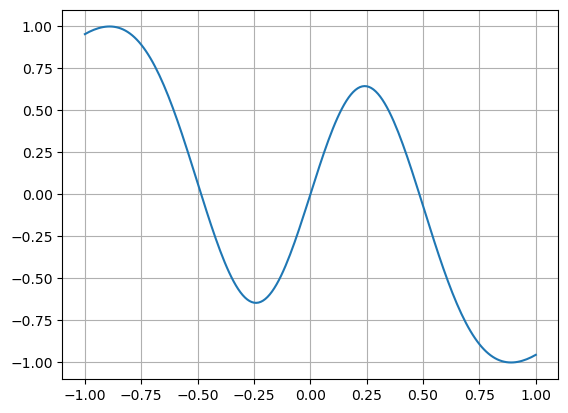

In [43]:
test = grf_sine_function(x_range)
plt.plot(x_range,test)
plt.grid()

In [56]:
num_points

201

In [36]:
test_value = fft.fft(x_range)

In [58]:
# plt.plot(test_value[0:10].imag)

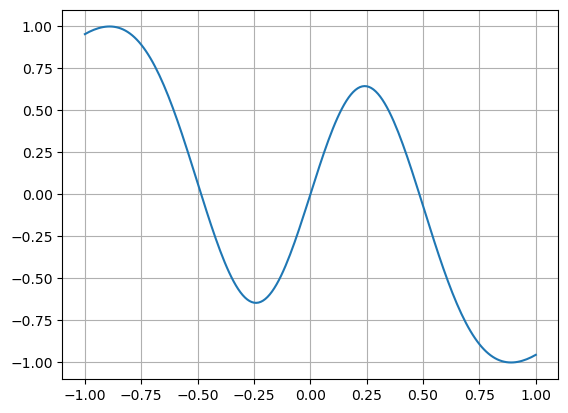

In [44]:
mean = 0
variance = np.random.random()
num_grfs = 1000
length = num_points
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, np.sqrt(variance), length)
window_size = 10
u_0 = test# s # np.convolve(s, np.ones(window_size)/window_size, mode='same') # initial_condition(x_range) # will give initial condition in the real space

# u_0 =   # initial_condition(x_range) # will give initial condition in the real space
plt.plot(x_range,u_0) # Plot for visualization

plt.grid()

##### Creating fft parameters

In [19]:
dt = 1e-2 # time step value
t_max = 1 # Maximum time range
num_t_points = int(round(t_max)/dt + 1) # Number of points
t_range = np.linspace(0,t_max,int(num_t_points))

In [20]:
kappa = 2*np.pi*fft.fftfreq(num_points,d=dx)
#u = fft.fft(u_0)
#plt.plot(kappa,u.real)
#plt.xlim([-10,10])

In [21]:
def du_dt(u,time_range,kappa,nu):
    u_hat = fft.fft(u)
    fourier_du_dx = 1j*kappa*u_hat
    fourier_du2_dx2 = -(kappa**2)*u_hat

    real_du_dt = fft.ifft(fourier_du_dx)
    real_du2_dx2 = fft.ifft(fourier_du2_dx2)

    return (-u*real_du_dt + nu*real_du2_dx2).real

In [22]:
Actual_data = np.zeros((num_points*num_t_points*num_grfs,num_points+3))
one_grf = num_points*num_t_points

In [64]:
Actual_data.shape

(20301000, 204)

In [65]:
# [u_0 , 0.2 , 0.3 , 1].shape
# np.array([u_0 , 0.2 , 0.3 , 1])
np.concatenate([u_0,np.array([0.2,0.3,1])])

array([ 2.37331214e-01,  3.20557044e-01, -3.40284415e-02,  2.44002431e-01,
       -3.50709191e-01,  1.42470592e+00, -7.16091133e-01, -6.77023115e-01,
       -9.06907550e-01,  7.15221713e-02,  3.76279282e-01,  3.55453690e-01,
        1.70915775e+00, -4.43487089e-01, -1.13672902e+00, -4.06063537e-01,
        1.91958045e+00,  1.48801042e+00, -2.05686499e-01, -6.76929312e-01,
       -1.23148999e+00,  4.32264219e-01,  2.84599239e-01,  5.97359070e-01,
       -1.68260989e+00, -8.90444212e-01, -5.71835782e-01, -1.92808102e+00,
        1.37079265e+00, -2.27070966e-01, -6.15662918e-01,  1.01028747e+00,
       -9.10686594e-02, -1.05018916e+00,  2.62126032e-02,  3.81286028e-01,
        2.91555351e-01, -8.75766364e-01, -2.15527390e-01, -9.65999432e-01,
       -1.53145610e+00, -1.19423421e-01, -3.99024171e-01, -6.43063335e-01,
        1.00105339e+00, -1.75033976e+00, -1.13610064e-01, -3.44147113e-01,
       -3.35252306e-01,  8.74918478e-01, -8.53703253e-02,  1.16949931e-01,
        4.79800455e-01,  

In [66]:
for i in range(num_grfs):
    np.random.seed(i)
    variance = np.random.random()
    # u_0 = np.random.normal(mean, np.sqrt(variance), length)
    u_0 = grf_sine_function(x_range)
    u_record = odeint(du_dt,u_0,t_range,args=(kappa,nu))
    for j in range(num_t_points):
        for k in range(num_points):
            # loc = i*one_grf + j*num_points + k
            Actual_data[i*one_grf + j*num_points + k,:] = np.concatenate([u_0,np.array([x_range[k],t_range[j],u_record[j,k]])])
    

In [67]:
import h5py

#with h5py.File("Burgers_generalised_dataset_2.h5","w") as f:
#    f.create_dataset("my_array",data=Actual_data, compression="gzip", compression_opts=3)

In [69]:
u_record = odeint(du_dt,u_0,t_range,args=(kappa,nu))
u_record[1,1]

0.37640223395403627

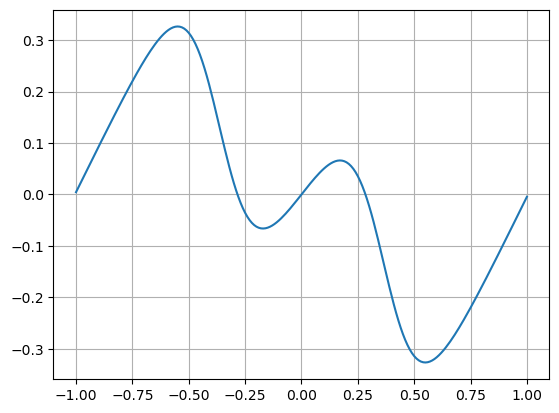

In [70]:
time_asked = int(0)#round(1/dt -1))
plt.plot(x_range,u_record[100,:])
plt.grid()

In [70]:
# u_record.shape

In [71]:
# print(num_t_points,num_points)

In [72]:
#U_value_stack = u_record.reshape(-1,1)
#x_range_stack = x_range.reshape(1,-1)
#x_range_stack = np.tile(x_range_stack,(num_t_points,1)).flatten().reshape(-1,1)
#time_range_stack = np.tile(t_range.reshape(-1,1),(1,num_points)).reshape(-1,1)
#u0_value_stack = np.tile(u_0.reshape(1,-1),(len(x_range_stack),1))

In [73]:
#Final_np_array = np.concatenate((u0_value_stack,x_range_stack,time_range_stack,U_value_stack),axis=1)
#Final_np_array.shape

In [74]:
#import pandas as pd

#Final_df = pd.DataFrame(Final_np_array)
#Final_df.head()

In [75]:
# Final_df.to_pickle("test_df.pkl")

In [76]:
# Final_df.to_csv("minus_sin_pix.csv")